In [1]:
#Used for math opperations
import numpy as np

#Used for plotting data
import matplotlib.pyplot as plt
%matplotlib inline

#Used to read outside files
import pandas as pd

### Get the Names of CSV files

In [2]:
System = input("Input Operating System; W for Windows, M for Mac or Linux: ")

Input Operating System; W for Windows, M for Mac or Linux: w


In [3]:
# A list of both n and s values
# Must be input as strings and include all sig-figs
# Maximum of nine s values

N = ['10','11']
S = ['0.000000','0.250000','0.500000']

In [4]:
if System == 'W' or 'w':
    Address = r'..\\..\\Data\\Heat Map\\Sphere\\'
elif System == 'M' or 'm':
    Address = r'..//..//Data//Heat Map//Sphere//'

In [5]:
# These Functions construct the addresses of all the files in the folder

def filenumber(n):
    if System == 'W' or 'w':
        number = Address + '\\' + n
    if System == 'M' or 'm':
        number = Address + '//' + n
    return number

def filename(n ,s):
    name = filenumber(n) + '_' + s + '.csv'
    return name

In [6]:
# This creates a list of all data addresses the user specified
Files = []

for n in range(len(N)):
    for s in range(len(S)):
        Files.append(filename((N[n]),S[s]))

### Get CSV Data

In [7]:
# Takes a csv file and reads all the data
def gettheta(file):
    colnames = ['theta', 'phi','data']
    File_Data = pd.read_csv(file, names=colnames)
    
    return list(File_Data['theta'])

In [8]:
def getphi(file):
    colnames = ['theta', 'phi','data']
    File_Data = pd.read_csv(file, names=colnames)
    
    return list(File_Data['phi'])

In [9]:
def getdata(file):
    colnames = ['theta', 'phi','data']
    File_Data = pd.read_csv(file, names=colnames)
    
    return list(File_Data['data'])

In [10]:
Theta = []
Phi = []
Trial_Data = []

for x in range(len(Files)):
    Theta.append(gettheta(Files[x]))
    Phi.append(getphi(Files[x]))
    Trial_Data.append(getdata(Files[x]))

### Getting Ready to Graph

In [11]:
def graph2DSphere(n):
    index = N.index(str(n))
    
    fig = plt.figure(figsize =(20,10))
    plt.style.use('fivethirtyeight')
    fig.suptitle("DFGFs on Sphere with N = {}".format(n), fontsize=25)
    
    x_label = [r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$", r"$\frac{5\pi}{4}$",r"$\frac{3\pi}{2}$",r"$\frac{7\pi}{4}$",r"$2\pi$"]
    y_label = [r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]
    
    for i in range(len(S)):
        ax = fig.add_subplot(3, 3, i+1)
        ax.scatter(Theta[(index*len(S))+i],Phi[(index*len(S))+i], cmap='coolwarm', alpha=.5, c = Trial_Data[(index*len(S))+i], s=50)
        
        ax.set_xticks(np.array([0, .25, .5, .75, 1, 1.25, 1.5, 1.75, 2])*np.pi)
        ax.set_xticklabels(x_label, fontsize=15)
        
        ax.set_yticks(np.array([0,.25,.5,.75,1])*np.pi)
        ax.set_yticklabels(y_label, fontsize=20)
        
        ax.set_xlabel('Polar Angle', fontsize=10)
        ax.set_ylabel('Azimuthal Angle', fontsize=10)
        
        ax.set_title('s = {}'.format(S[i]))

## Graphs

### 2D Graph

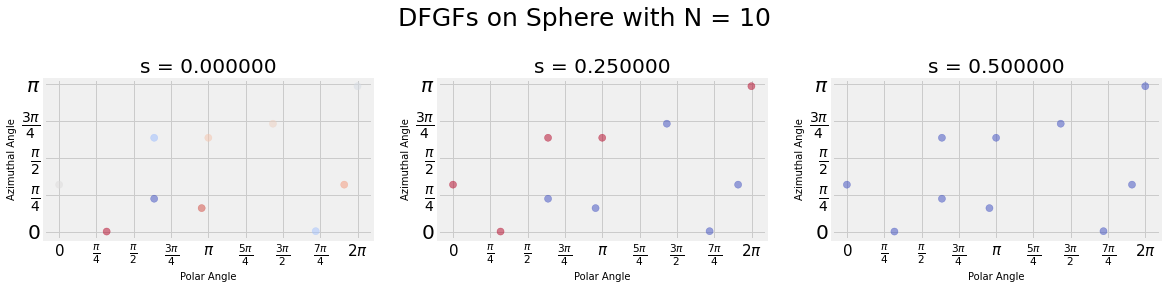

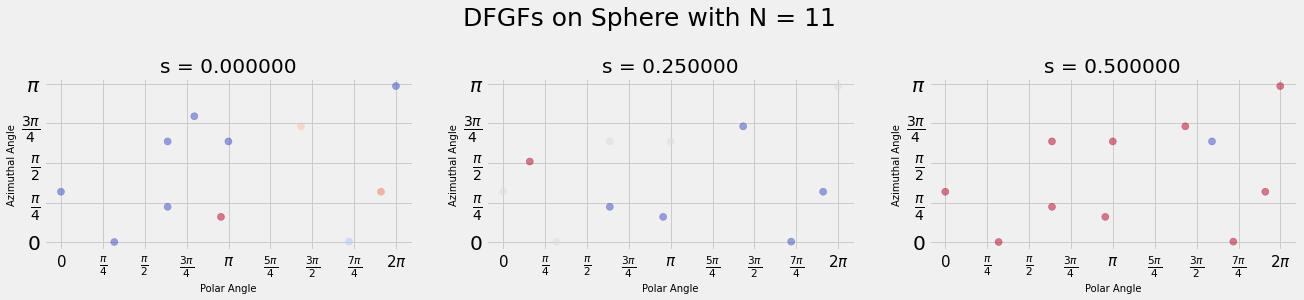

In [12]:
%matplotlib inline
for n in range(len(N)):
    graph2DSphere(int(N[n]))